<a href="https://colab.research.google.com/github/Yappert/Yappert/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
! pip install -q kaggle

In [339]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [340]:
!chmod 600 ~/.kaggle/kaggle.json

In [341]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [342]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [343]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [344]:
df = pd.read_csv('/content/archive.zip')
display(df.head(2)) # display first record of data
display(df.tail(2)) # display last 4 record of data
display(df.sample(4)) # display randomly anynumber of data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
148,2,2,aug,tue,94.8,108.3,647.1,17.0,17.4,43,6.7,0.0,1.07
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
373,5,4,aug,thu,94.8,222.4,698.6,13.9,20.3,42,2.7,0.0,0.00
325,1,4,sep,sat,92.2,102.3,751.5,8.4,24.2,27,3.1,0.0,0.00


In [345]:
#number of rows and colums
df.shape

(517, 13)

In [346]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [348]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [349]:
df.shape

(517, 13)

In [350]:
df=df.drop_duplicates()

In [351]:
# chek the shape after drop the duplicate
df.shape

(513, 13)

In [352]:
# chek of null values,
# chek the missing value in any dataset
# display number of null value in every column in dataset
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [353]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [354]:
print ('No of zero value in month', df[df['month']==0].shape[0])

No of zero value in month 0


In [355]:
print ('No of zero value in day', df[df['day']==0].shape[0])

No of zero value in day 0


In [356]:
print ('No of zero value in FFMC', df[df['FFMC']==0].shape[0])

No of zero value in FFMC 0


In [357]:
print ('No of zero value in DMC', df[df['DMC']==0].shape[0])

No of zero value in DMC 0


In [358]:
print ('No of zero value in DC', df[df['DC']==0].shape[0])

No of zero value in DC 0


In [359]:
df['X']=df['X'].replace(0,df['X'].mean())
print('no of zero value in X',df[df['X']==0].shape[0])

no of zero value in X 0


In [360]:
df['Y']=df['Y'].replace(0,df['Y'].mean())
df['DC']=df['DC'].replace(0,df['DC'].mean())
df['ISI']=df['ISI'].replace(0,df['ISI'].mean())
df['FFMC']=df['FFMC'].replace(0,df['FFMC'].mean())

In [361]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.041177,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.558097,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.400000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Negative (0):
Positive (1):


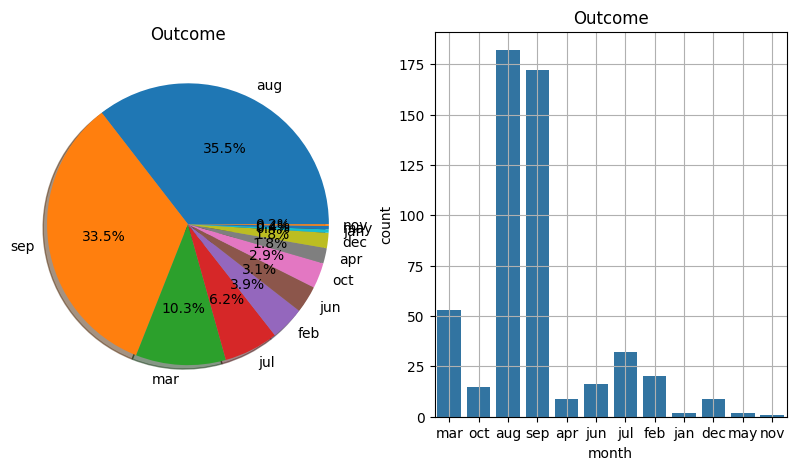

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(10, 5))
df['month'].value_counts().plot.pie(x=(0, 0.1), autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='month', data=df, ax=ax[1])
ax[1].set_title('Outcome')
df['month'].value_counts()
print('Negative (0):')
print('Positive (1):')
plt.grid(True)
plt.show()

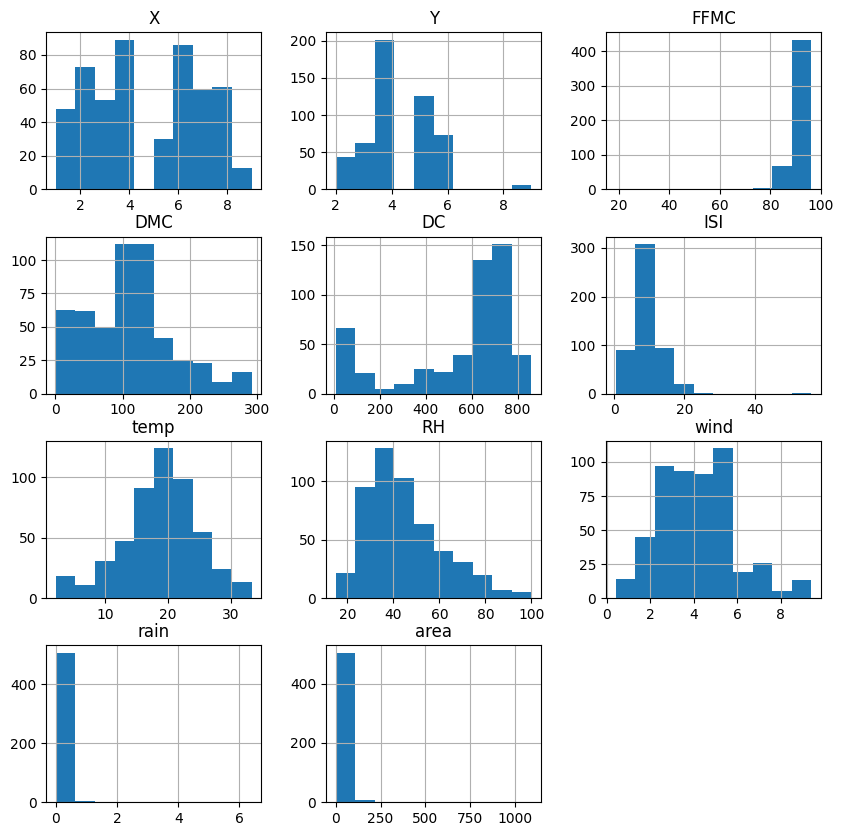

In [363]:
df.hist(bins=10,figsize=(10,10))
plt.show()

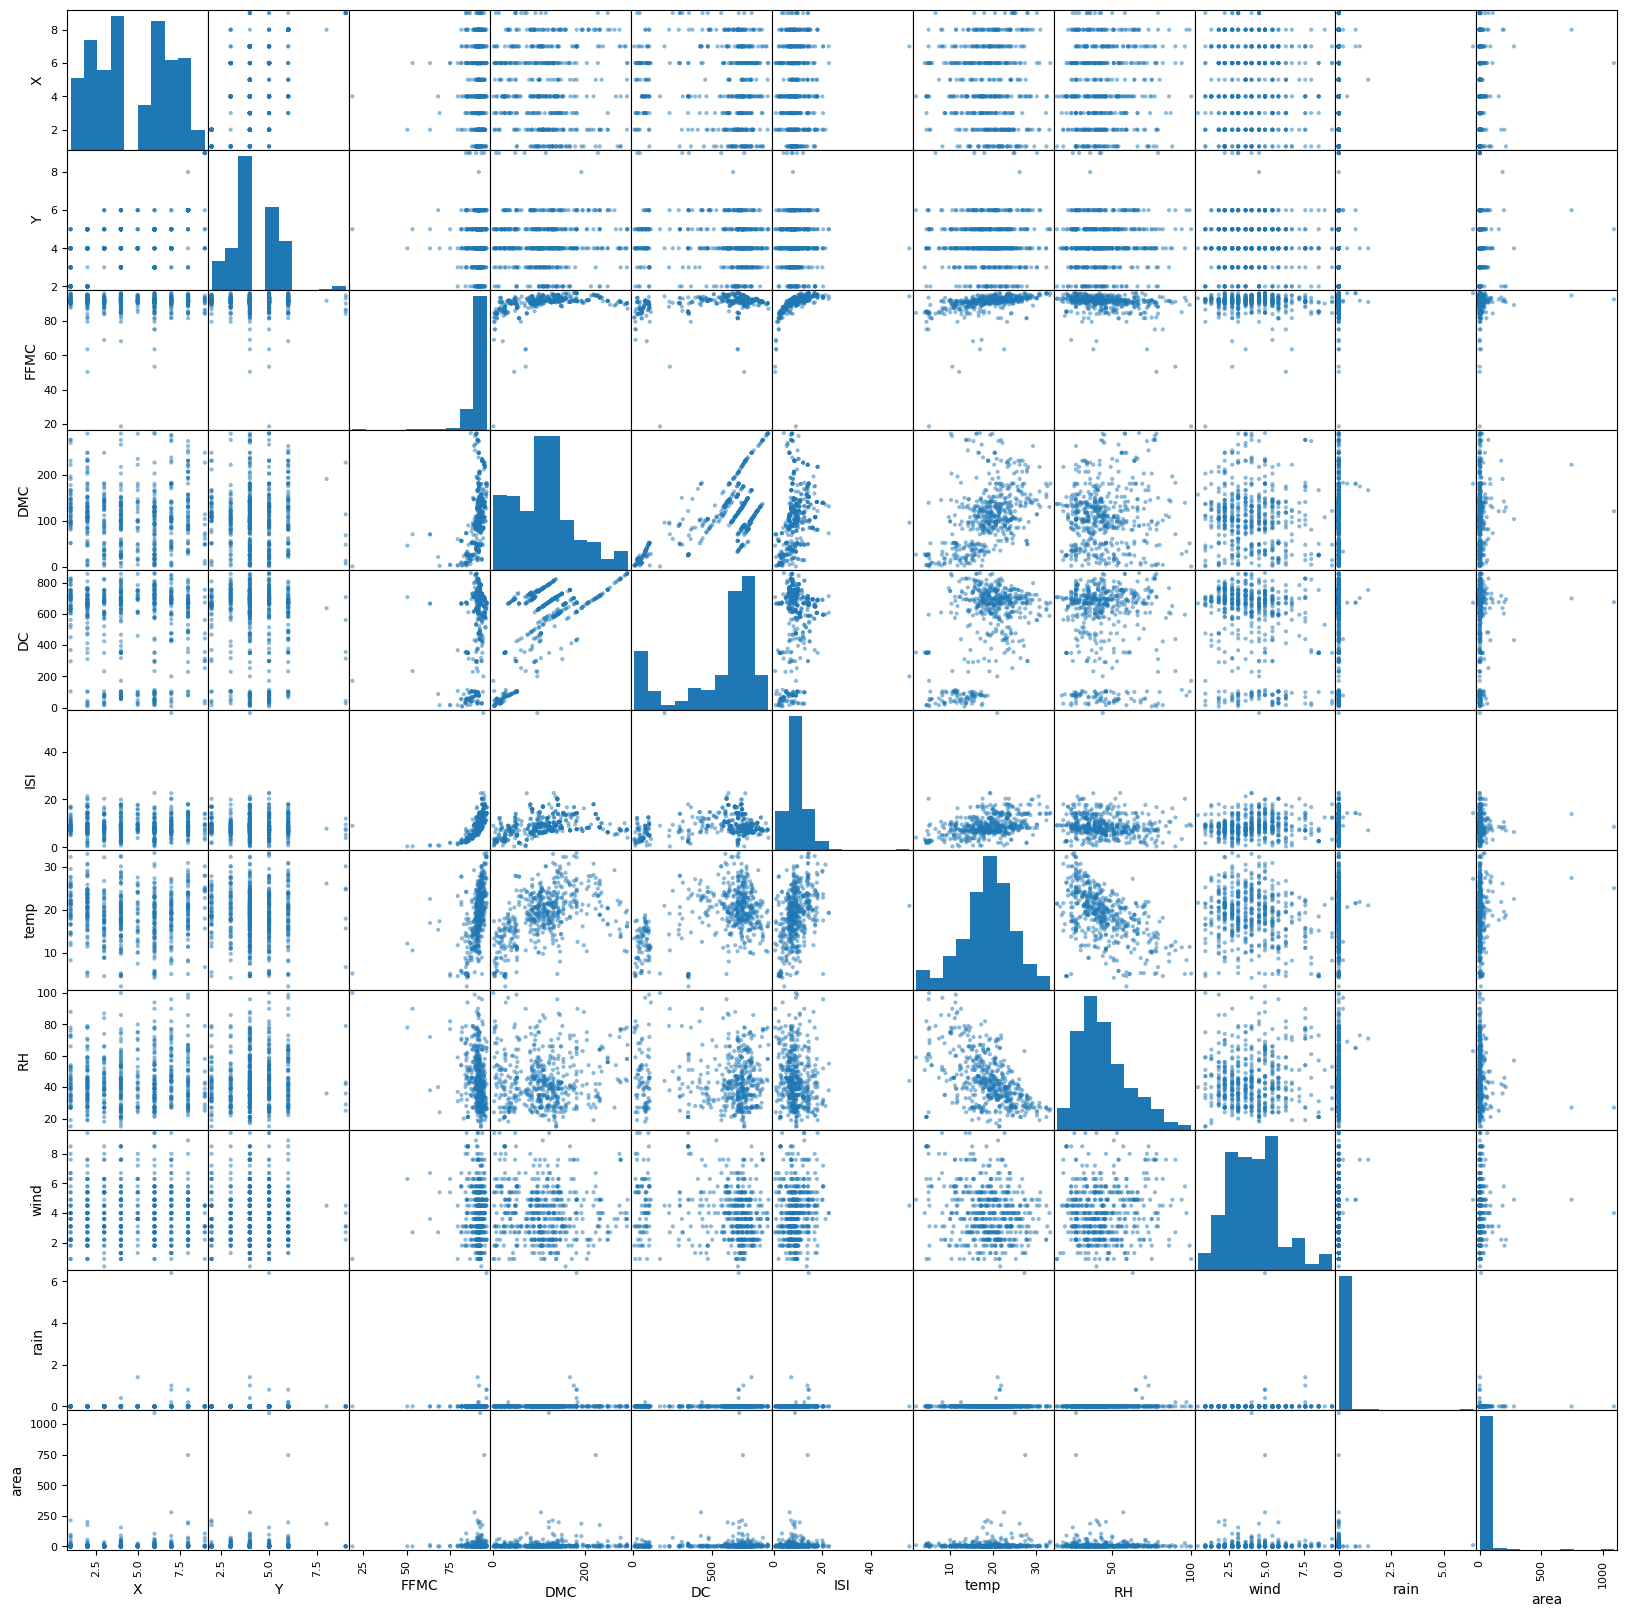

In [364]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20));

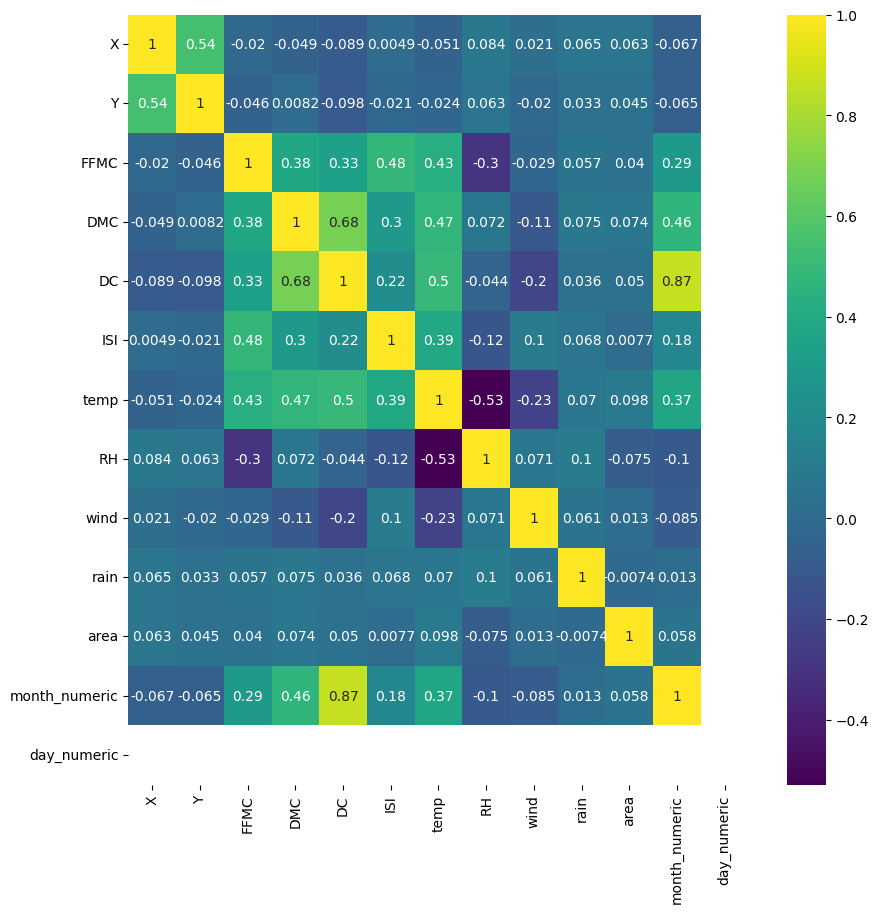

In [365]:
df['month_numeric'] = pd.to_datetime(df['month'], format='%b').dt.month
df['day_numeric'] = pd.to_datetime(df['day'], format='%a').dt.dayofweek
df_numeric = df.drop(columns=['month', 'day'])

# Jalankan kode untuk heatmap korelasi
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df_numeric.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, annot=True, cmap="viridis")
plt.show()

In [366]:
target_name = 'DMC'
y = df[target_name]
x = df.drop(target_name, axis=1)

X.head()
y.head()

0    26.2
1    35.4
2    43.7
3    33.3
4    51.3
Name: DMC, dtype: float64

In [367]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
X = df_encoded[columns_to_scale]
X_scaled = scaler.fit_transform(X)
df_encoded[columns_to_scale] = X_scaled
print(df_encoded.head())

   X  Y  day      FFMC       DMC        DC       ISI      temp        RH  \
0  7  5  fri -0.801628 -1.322179 -1.837925 -0.865498 -1.835573  0.406971   
1  7  4  tue -0.006761 -1.178717  0.484659 -0.514132 -0.152432 -0.694428   
2  7  4  sat -0.006761 -1.049290  0.556583 -0.514132 -0.736379 -0.694428   
3  8  6  fri  0.191956 -1.211464 -1.905808 -0.009043 -1.818399  3.221658   
4  8  6  sun -0.241608 -0.930777 -1.806003  0.122720 -1.285976  3.344035   

       wind  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0  1.498430  ...      False      False      False      False      False   
1 -1.733018  ...      False      False      False      False      False   
2 -1.510159  ...      False      False      False      False      False   
3 -0.005865  ...      False      False      False      False      False   
4 -1.231586  ...      False      False      False      False      False   

   month_mar  month_may  month_nov  month_oct  month_sep  
0       True      False      Fals

In [368]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

print("Ukuran data latih:")
print("Fitur (x_train):", x_train.shape)
print("Target (y_train):", y_train.shape)
print("\nUkuran data uji:")
print("Fitur (x_test):", x_test.shape)
print("Target (y_test):", y_test.shape)

Ukuran data latih:
Fitur (x_train): (410, 9)
Target (y_train): (410,)

Ukuran data uji:
Fitur (x_test): (103, 9)
Target (y_test): (103,)


In [369]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
sv.fit(x_train, y_train_encoded)

SVC()

In [370]:
sv_pred=sv.predict(x_test)
sv_pred.shape

(103,)

In [371]:
from sklearn.metrics import mean_squared_error
y_train_pred = sv.predict(x_train)
y_test_pred = sv.predict(x_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Mean Squared Error of SVM:", train_mse)
print("Test Mean Squared Error of SVM:", test_mse)

Train Mean Squared Error of SVM: 1314.5044146341465
Test Mean Squared Error of SVM: 1425.0518446601943


In [372]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
binary_y_test_pred = (y_test_pred > threshold).astype(int)
binary_y_test = (y_test > threshold).astype(int)
cm = confusion_matrix(binary_y_test, binary_y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[103]]


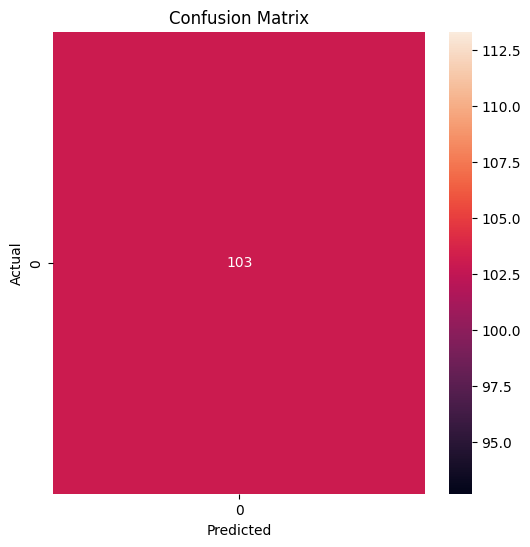

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [374]:
import numpy as np
from sklearn.metrics import classification_report

# Set format tampilan angka desimal untuk laporan klasifikasi
np.set_printoptions(precision=4)

# Menampilkan laporan klasifikasi dari model SVM
print('Classification Report of SVM : \n', classification_report(binary_y_test, binary_y_test_pred))

Classification Report of SVM : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       103

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [375]:
from sklearn.metrics import confusion_matrix

# Prediksi model dan label sebenarnya
y_test = [1, 0, 1, 1, 0]  # Label sebenarnya
sv_pred = [1, 0, 1, 0, 1]  # Prediksi model

# Membuat matriks kebingungan
cm = confusion_matrix(y_test, sv_pred)

# Mendapatkan nilai TN, FP, FN, dan TP dari matriks kebingungan
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Mencetak hasil
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

True Negatives (TN): 1
False Positives (FP): 1
False Negatives (FN): 1
True Positives (TP): 2


In [376]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

y_test = [1, 0, 1, 1, 0]
sv_pred = [1, 0, 1, 0, 1]
cm = confusion_matrix(y_test, sv_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, sv_pred))
accuracy = accuracy_score(y_test, sv_pred)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[1 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Accuracy: 0.6


In [377]:
print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate of SVM: {:.2f}%'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate of SVM: {:.2f}%'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 1
FP - False Positive 1
FN - False Negative 1
TP - True Positive 2
Accuracy Rate of SVM: 60.00%
Misclassification Rate of SVM: 40.00%


<Axes: >

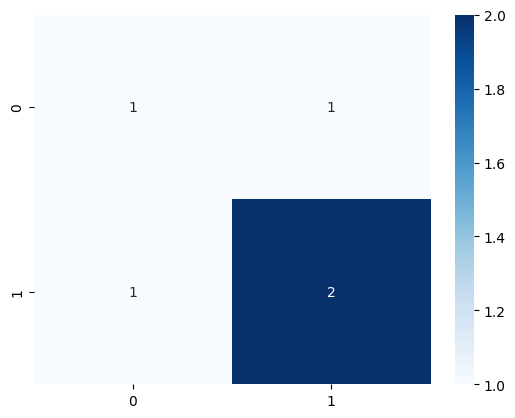

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,sv_pred),cmap='Blues', annot=True, fmt="d")

In [379]:
from sklearn.metrics import classification_report

print('Classification Report of SVM : \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM : 
               precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000         2
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.6000         5
   macro avg     0.5833    0.5833    0.5833         5
weighted avg     0.6000    0.6000    0.6000         5



In [380]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

TN, FP, FN, TP

(1, 1, 1, 2)

In [381]:
# PRECISION (PPV-Positive Prediction Value)
# Precision = TP/(TP+FP), where TP = True Positive, FP = False Positive
TP, FP

(2, 1)

In [382]:
# PRECISION (PPV-Positive Prediction Value)
# Precision = TP/(TP+FP), where TP = True Positive, FP = False Positive

precision = TP / (TP + FP)
precision

0.6666666666666666

In [383]:
precision_score = TP/float(TP+FP)*100
print('Precision Score : {0:0.4f}'.format(precision_score))

Precision Score : 66.6667


In [384]:
from sklearn.metrics import precision_score
print("Precision Score is :", precision_score(y_test, sv_pred)*100)
print("Micro Average Precision Score is :",precision_score(y_test,sv_pred,average='micro')*100)
print("Macro Average Precision Score is :",precision_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average Precision Score is :",precision_score(y_test,sv_pred,average='weighted')*100)
print("Precision Score on non weighted Precision Score is :",precision_score(y_test,sv_pred,average=None)*100)

Precision Score is : 66.66666666666666
Micro Average Precision Score is : 60.0
Macro Average Precision Score is : 58.33333333333333
Weighted Average Precision Score is : 60.0
Precision Score on non weighted Precision Score is : [50.     66.6667]


In [385]:
recall_score = TP/float(TP+FN)*100
print('recall_score',recall_score)

recall_score 66.66666666666666


In [386]:
TP,FN
recall_score=TP/FN

In [387]:
from sklearn.metrics import recall_score
print('Recall Sensitivity_score :',recall_score(y_test,sv_pred)*100)

Recall Sensitivity_score : 66.66666666666666


In [388]:
print("Micro Average Precision Score is :",precision_score(y_test,sv_pred,average='micro')*100)
print("Macro Average Precision Score is :",precision_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average Precision Score is :",precision_score(y_test,sv_pred,average='weighted')*100)
print("Precision Score on non weighted Precision Score is :",precision_score(y_test,sv_pred,average=None)*100)

Micro Average Precision Score is : 60.0
Macro Average Precision Score is : 58.33333333333333
Weighted Average Precision Score is : 60.0
Precision Score on non weighted Precision Score is : [50.     66.6667]


In [389]:
print('Classification Report of Neutral Network: \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of Neutral Network: 
               precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000         2
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.6000         5
   macro avg     0.5833    0.5833    0.5833         5
weighted avg     0.6000    0.6000    0.6000         5



In [390]:
#FALSE POSITIVE RATE (FPR)
FPR=FP/float(FP+TN)*100
print('False Positive Rate :{0:0.4f}'.format(FPR))
FP,FN

False Positive Rate :50.0000


(1, 1)

In [391]:
14/(14+83)

0.14432989690721648

In [392]:
#SPECIFICITY
specificity=TN/(TN+FP)*100
print('Specificity :{0:0.4f}'.format(specificity))

Specificity :50.0000


In [393]:
from sklearn.metrics import f1_score
print('f1_score of macro:',f1_score(y_test,sv_pred)*100)

f1_score of macro: 66.66666666666666


In [394]:
print("Micro Average F1 Score is :",f1_score(y_test,sv_pred,average='micro')*100)
print("Macro Average F1 Score is :",f1_score(y_test,sv_pred,average='macro')*100)
print("Weighted Average F1 Score is :",f1_score(y_test,sv_pred,average='weighted')*100)
print("F1 Score on non weighted Score is :",f1_score(y_test,sv_pred,average=None)*100)

Micro Average F1 Score is : 60.0
Macro Average F1 Score is : 58.33333333333333
Weighted Average F1 Score is : 60.0
F1 Score on non weighted Score is : [50.     66.6667]


In [395]:
#Area Under Curve
auc = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of SVM is", auc)

ROC AUC SCORE of SVM is 0.5833333333333333


In [396]:
from sklearn.metrics import roc_auc_score
auc=round(roc_auc_score(y_test,sv_pred)*100,2)
print("ROC AUC SCORE of SVM is ",auc)

ROC AUC SCORE of SVM is  58.33


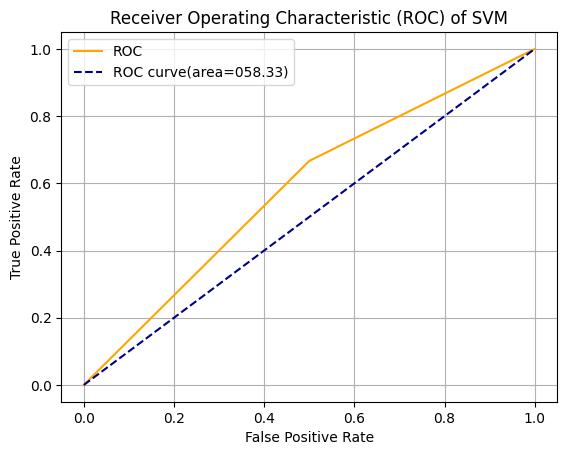

In [397]:
fpr, tpr, tresholds=roc_curve(y_test,sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=0%.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of SVM')
plt.legend()
plt.grid()
plt.show()